In [1]:
import numpy as np
import scipy as sp
import sklearn
import csv
import os
import glob
import keras
import keras.preprocessing.image
from matplotlib import pyplot as plt
from keras.applications.resnet50 import ResNet50
from keras.layers import Activation, Flatten, Dense
from keras.models import Sequential

Using TensorFlow backend.


In [4]:
num_classes = 3
resnet = ResNet50(include_top=False, 
                  input_shape=(224, 224, 3))


e:\prgfiles\miniconda3\lib\site-packages\keras_applications\resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [5]:
resnet.trainable = False
resnet.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [6]:
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25690368  
_________________________________________________________________
activation_50 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
_________________________________________________________________
activation_51 (Activation)   (None, 3)                 0         
Total params: 49,278,851
Trainable params: 25,691,139
Non-trainable params: 23,587,712
_______________________________________________________

In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
def get_batches(path, gen, shuffle=True, batch_size=8, class_mode='categorical'):
    return gen.flow_from_directory(path, target_size=(224,224),
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

bs = 32

p_t = "./train/" # put your own value: path to the train dataset folder (has subfolders melanoma etc.)
gen_t = keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255, 
    zoom_range=0.2,
    rotation_range=360, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    vertical_flip=True,
    horizontal_flip=True
)

batches_t = get_batches(p_t, gen_t, batch_size=bs)

p_v = "./valid/" # put your own value: path to the valid dataset folder (has subfolders melanoma etc.)
gen_v = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batches_v = get_batches(p_v, gen_v, shuffle=False, batch_size=50)

Found 2000 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [10]:
num_epochs = 20
train_steps = batches_t.n // batches_t.batch_size
validation_steps = batches_v.n // batches_v.batch_size
result = model.fit_generator(batches_t, steps_per_epoch=train_steps, epochs=num_epochs, 
                             validation_data=batches_v, validation_steps=validation_steps)

Epoch 1/20
62/62 [==============================] - 1449s 23s/step - loss: 4.9636 - acc: 0.6845 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 2/20
62/62 [==============================] - 1440s 23s/step - loss: 5.0370 - acc: 0.6875 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 3/20
62/62 [==============================] - 1431s 23s/step - loss: 5.1263 - acc: 0.6820 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 4/20
62/62 [==============================] - 1478s 24s/step - loss: 5.0207 - acc: 0.6885 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 5/20
62/62 [==============================] - 1412s 23s/step - loss: 5.0370 - acc: 0.6875 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 6/20
62/62 [==============================] - 1411s 23s/step - loss: 5.0779 - acc: 0.6850 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 7/20
62/62 [==============================] - 1414s 23s/step - loss: 5.0774 - acc: 0.6850 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 8/20
62/62 [==============================] - 1412s 23s/step - 

# Save

In [11]:
model_json = model.to_json()

json_file = open("model.json", "w")
json_file.write(model_json)
json_file.close()

model.save_weights("model.h5")

# Load

In [7]:
from keras.models import model_from_json

json_file = open("model.json", "r")
model_json = json_file.read()
json_file.close()

model = model_from_json(model_json)

model.load_weights("model.h5")
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# plot learning curves

In [12]:
result.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x2303ad44b00>,
 'params': {'epochs': 20,
  'steps': 62,
  'verbose': 1,
  'do_validation': True,
  'metrics': ['loss', 'acc', 'val_loss', 'val_acc']},
 'epoch': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19],
 'history': {'val_loss': [7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297,
   7.736685812473297],
  'val_acc': [0.5199999995529652,
   0.5199999995529652,
   0.5199999995529652,
   0.5199999995529652,
   0.5199999995529652,
   0.5199999995529652,
   0.5199999995529652,
   0.519999999552

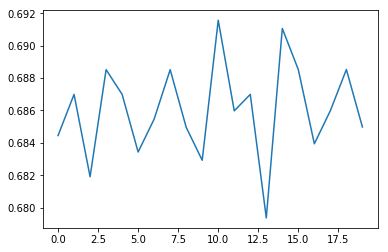

In [13]:
plt.plot(list(range(num_epochs)), result.history['acc'])

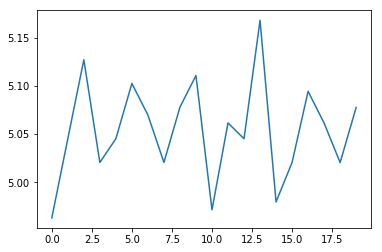

In [14]:
plt.plot(list(range(num_epochs)), result.history['loss'])

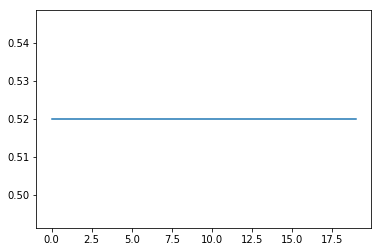

In [15]:
plt.plot(list(range(num_epochs)), result.history['val_acc'])

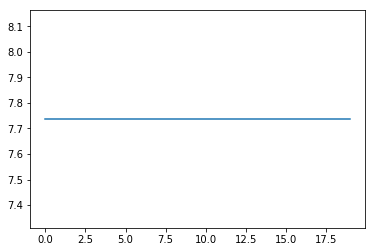

In [16]:
plt.plot(list(range(num_epochs)), result.history['val_loss'])

# Test

In [13]:
p_t = "./test1/" # put your own value: path to the valid dataset folder (has subfolders melanoma etc.)
bt = 50
gen_t = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batches_t = get_batches(p_t, gen_t, batch_size=bt)

score = model.evaluate_generator(batches_t, batches_t.n // batches_t.batch_size)
print(score)

Found 600 images belonging to 3 classes.
[5.560742894808452, 0.6550000011920929]


In [16]:
print('Accuracy на тесте составило %.2f%%' % (score[1]*100))
print('Loss на тесте составило %.2f' % (score[0]))

Accuracy на тесте составило 65.50%
Loss на тесте составило 5.56
